# Gradient Visualization with Matplotlib

In this short project, we will visualize the gradients for a 2-Dimensional equation. Feel free to try your own equation! 

This project is primarily focused on understanding gradients; however, we will also learn some helpful programming skills along the way. For example, we will be working with meshgrids, which are useful whenever you want to display information associated with different points on an array. Furthermore, learning to visualize information using matplotlib is a valuable skill. In this project, we will utilize both a quiver plot and a pcolor plot. 

Let's get started!

## Derivatives

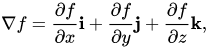

In [ ]:
gradient === derivative=== rate of change == similar to (slope = tangent)

derivative= d/dx==gradient == like neural network like variable and weight etc outcome 

gradient: 1- rate of change of displacement with time
          2- slope or tangent of a curve

y=f(x)  d/dx     dy/dx    =      df/dx    ==        f' == 

d/dx(constant number or scalar)==0

2X^3 ==== 2 3 x^2 = 6x^2

power rule == d/dx(2x^n)  ==   2 n x^(n-1) dx/dx     == 2nx^(n-1)


sume rule == A(x)+B(x) like 2x + 3x^2

2x+3x^2 == 2 + 6x === 6x +2

product rule==f(x)g(x)=f(x)g'(x) + f'(x)g(x)
2xx^2 == 2x 2x + 2x^2==4x^2+2X^2 = 6x^2

chain rule = =very important for machine learning
f(g(x)) == f'(g(x))g'(x) == sin(x^2)==cos(x^2)2x==2xcos(x^2)

partial derivative==more than one variable
d/dx(f(x,y))==derivative only with respect to x and not y==constant

## Integration

In [ ]:
https://en.wikipedia.org/wiki/Integral

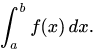

In [ ]:
Area under the curve == reverse process of derivatives == anti-derivative

indefinite == no limit like numbers, -inifinit to +infinit
definite == with limits, like 0 to 10
represented by first line shown above

integral{f'(x)}dx == f(x) + constant

power rule == d/dx(2x^n)  ==   2 n x^(n-1) dx/dx     == 2nx^(n-1)
     ====== integral{x^n}dx == (x^n+1)/(n+1) + constant
2X^3 ==== 2 3 x^2 = 6x^2 ==== integral{6x^2}   ?????

integral{Apple}dx == Apple x + constant
integral of 4 is 4x + constant

definite == with limits, like 0 to 10
integral{}_a(^b) = solution of integral at x=b - value of solution at x=a
also we can write as integral{f'(x)} = f(x)|_a|^b=f(b)-f(a)
integral{2X^3}_0|^3 ==  

## Greadient = vector calculus

In [ ]:
nebla operator = differential= partial derivative = gradient == 
[∂/∂x, ∂/∂y] == array of length 2
slope or rate of change of the function or curve

dradient[f(x,y)] == [∂/∂x f(x,y), ∂/∂y f(x,y)]
solve example == 3(x^2)y ==  ?????

Greadient pointing out in the direction of greatest way of increase of function, 
magnitude is slope in that direction,

loss function, negative of gradient, then minimise loss function

see high dimensional vector column and matrix to use in ML and neural network

jacobian and general case pics

## Gradient Visualization

In [ ]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print 'Python: {}'.format(sys.version)
print 'NumPy: {}'.format(np.__version__)
print 'Matplotlib: {}'.format(matplotlib.__version__)

Python: 2.7.17 (default, Sep 30 2020, 13:38:04) 
[GCC 7.5.0]
NumPy: 1.16.4
Matplotlib: 2.2.4


The above cells import the libraries and packages we will be using. It's always a good idea to print the version numbers of the libraries you are using. This ensures the libraries have been installed correctly and improves reproducibility. 

Using NumPy, we can generate a meshgrid of x and y points. This meshgrid is a large 2D array that we will use for our plots.  Furthermore, let's also define a function to plot.  The z value at each x,y point on the meshgrid will be calculated with this function

In [ ]:
# generate 2D meshgrid
nx, ny = (100, 100)

x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)

xv, yv = np.meshgrid(x,y)

# define function to plot
def f(x,y):
    return x * (y**2)

# calculate Z value for each X,Y point
z = f(xv, yv)

Now that we have our meshgrid and have calculated f(x,y) for all points on the meshgrid, we can visualize the results! The z points on the graph will be represented using a colormap. 

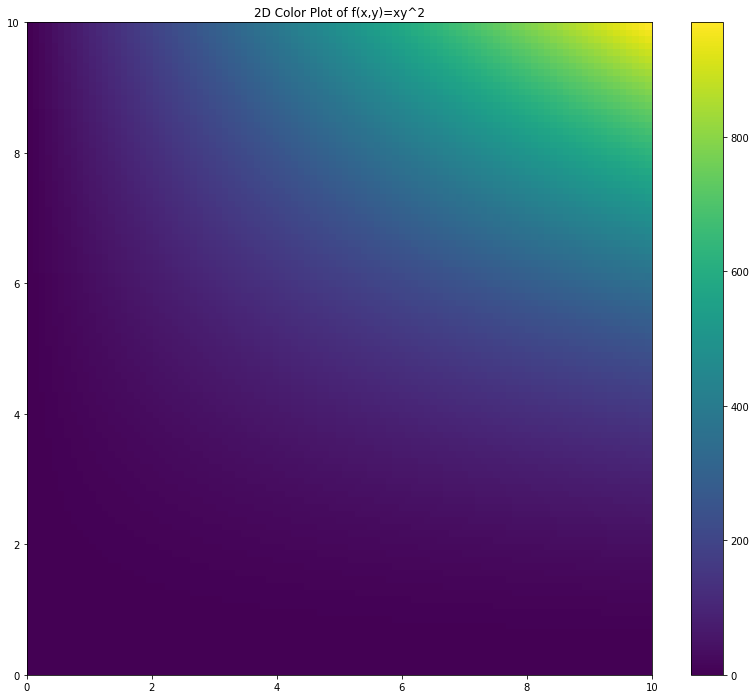

In [ ]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.title('2D Color Plot of f(x,y)=xy^2')
plt.colorbar()
plt.show()

Looks good! Now that we have our plot, let's add the gradient. Instead of calculating the gradient at every single point on this graph, we will define a new meshgrid with fewer points.  The gradient can then be calculated at each point using NumPy's gradient() command.  Be careful though, since NumPy returns an array, it will be in row, column format instead of x, y format.

In [ ]:
# generate 2D meshgrid for Gradient
nx, ny = (10, 10)
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xg, yg = np.meshgrid(x,y)

# calculate the gradient of f(x,y)
# Note: numpy returns answer in rows (y), columns (x) format
Gy, Gx = np.gradient(f(xg, yg))

In [ ]:
since it's numpy, it delas with rows first format, rows and then column. 
rows actually be y and column are x
Hence, y-values first and x values second

In [ ]:
The numpy module of Python provides meshgrid() function for creating a 
rectangular grid with the help of the given 1-D arrays that represent the 
Matrix indexing or Cartesian indexing. ... From the coordinate vectors, 
the meshgrid() function returns the coordinate matrices.

Visualize the gradient using matplotlib's quiver plot. The direction of the gradient is represented by the angle of the arrow, while the magnitude is represented by the length of the arrow. 

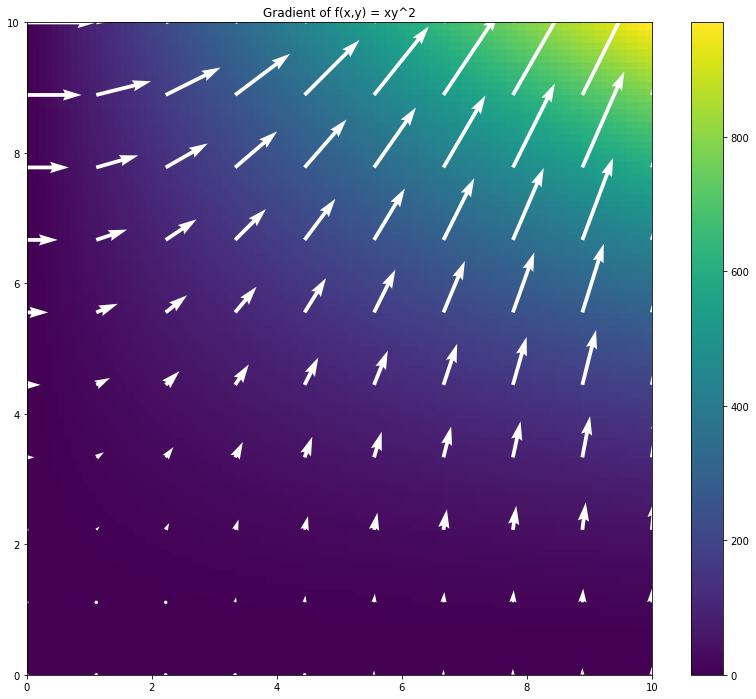

In [ ]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
plt.title('Gradient of f(x,y) = xy^2')
plt.show()

The plot above looks perfect! The arrows are pointing in the direction of maximum increase and their magnitude is equal to the slope at these locations. But how do we know that the gradient was calculated correctly? We can ensure that NumPy is calculating it correctly by finding the partial derivatives.  The gradient is simply an array of partial derivatives; as a result, we should be able to reproduce these results by calculating the following:

$\nabla f(x,y) = \begin{bmatrix} \frac{d}{dx}f(x,y) && \frac{d}{dy}f(x,y) \end{bmatrix}$

For the function $f(x,y) = xy^2$, the partials will be the following:

$\nabla f(x,y) = \begin{bmatrix}y^2&&2xy\end{bmatrix}$

By defining our own functions, we can easily calculate the x and y components of the gradient at every point on the meshgrid.

In [ ]:
# calculate the gradient of f(x,y) = xy^2
def ddx(x,y):
    return y ** 2

def ddy(x,y):
    return (2 * y * x)

Gx = ddx(xg,yg)
Gy = ddy(xg,yg)

Time to visualize the results!

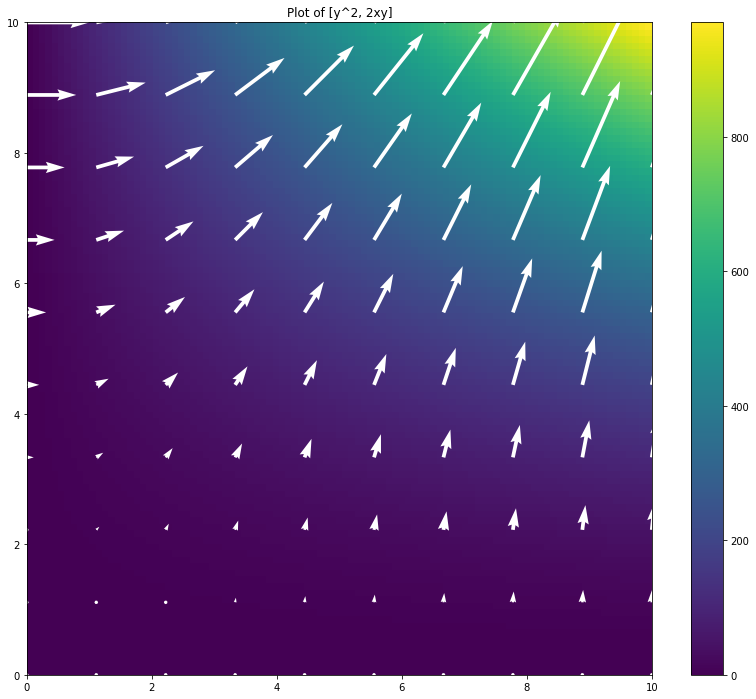

In [ ]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
plt.title('Plot of [y^2, 2xy]')
plt.show()

## Optimization

In [ ]:
important for deep learning / neural network and artifical intelligence applications

In [ ]:
objective function to minimize is f_0(x) == what we need to minimize == loss function
x is optimization variable that we need to update to minimize the objective function
x is going to be vector of input in case of neural network example


In [ ]:
constraint function
<=0 or =0   either f or h where loop from j=0 to n


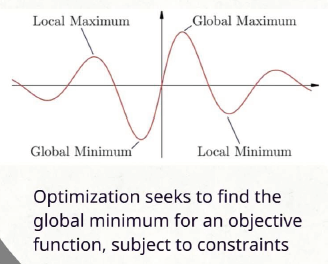

In [ ]:
local  and global critical points
1- either max or mini, derivative is zero so slope at local/global min or max is zero
2- global min is absolute smallest point in graph and similarly absolute largest point is global max 
2- local minimum is the secondry negative point and local maximum is secondry positive point
3- local minimum are problems always to compare with global


In [ ]:
example of y = x^2 + 3
1- first derivative = 2x == 0   x =0
2- second   f''         2 {if positive we have a minimum otherwise for negative we have a maximum}
this will help us to know how slope is changing
3- slope is going to increase and going upward so we have a positive correspond to a minimum
if slope is going downward and negative direction we have a maximum, bcz we are at top.

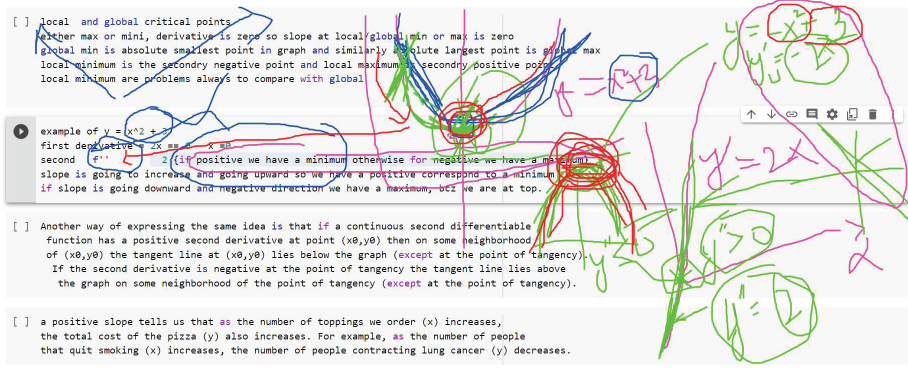

In [ ]:
concave up and convex (line above curve) problem 

In [ ]:
Another way of expressing the same idea is that if a continuous second differentiable
 function has a positive second derivative at point (x0,y0) then on some neighborhood 
 of (x0,y0) the tangent line at (x0,y0) lies below the graph (except at the point of tangency).
  If the second derivative is negative at the point of tangency the tangent line lies above
   the graph on some neighborhood of the point of tangency (except at the point of tangency).

In [ ]:
a positive slope tells us that as the number of toppings we order (x) increases, 
the total cost of the pizza (y) also increases. For example, as the number of people 
that quit smoking (x) increases, the number of people contracting lung cancer (y) decreases.

In [ ]:
while in machine leraning, we dont need derivative only but we have an iterative process

gradient will tell only which way to change parameter

gradient will tell us the max increase as before

indeed gradient of our objective function we are going to know max decrease as negative gradient

